In [ ]:
# 추천시스템

In [ ]:
# 판다스로도 가능!

In [ ]:
# 추천시스템은 롱테일 쪽에 가까움.
# CB(Content Based), CF(Collaborative Filtering)의 문제점을 잘 알고 있어야 함
# Serendipity

In [ ]:
# USER & ITEM 이라는 테이블을 만듦
# column 에 item  -> column이 많이 늘어나면 wide-format 은 별로 안 좋음
# row 에 user

In [ ]:
# 샀으면 1, 안 샀으면 0 => missing data 가 있으면 안됨. 안 산 것을 default 값으로 처리
# 이렇게 matrix 를 만들고 나면, 이용자들 중 제일 비슷한 사람을 찾는 것이 핵심

In [ ]:
# pair-wise(row-wise) row끼리 연산

In [ ]:
# 유사도를 측정하는 방법은 매우 많음
# 우리는 거리 기반, 유클리드 거리를 구하거나, 코사인 유사도를 이용해서 거리를 구할 수 있음.(코사인 유사도가 클수록 가까움)
# 매우 많음
# 어떻게 구할지를 고민해볼 것.

In [1]:
import pandas as pd

In [4]:
ls

?moon.ipynb
03.02(오후).ipynb
03.03(오전).ipynb
03.03(오후).ipynb
03.06(오전).ipynb
03.06(오후).ipynb
03.07(오전).ipynb
03.07(오후).ipynb
03.08(오전).ipynb
03.08(오후).ipynb
03.09(오전).ipynb
03.09(오후).ipynb
03.10(오전).ipynb
03.10(오후).ipynb
03.13(오전).ipynb
03.13(오후).ipynb
03.14(오전).ipynb
03.14(오후).ipynb
03.15(오전).ipynb
03.15(오후).ipynb
03.16(오전).ipynb
03.16(오후).ipynb
03.17(오전).ipynb
03.17(오후).ipynb
03.20(오전).ipynb
03.20(오후).ipynb
03.21(오전).ipynb
03.21(오후).ipynb
03.22(오전).ipynb
03.22(오후).ipynb
03.23(오전).ipynb
03.23(오후).ipynb
NumPy 과제.ipynb
OOP_1_Objects_and_types.ipynb
OOP_2_Classes_and_members.ipynb
OOP_3_Delegation__composition_and_inheritance.ipynb
OOP_4_Polymorphism.ipynb
OOP_5_Metaclasses.ipynb
OOP_6_Abstract_Base_Classes.ipynb
Testing.ipynb
__pycache__/
a.csv
a.txt
chromedriver_mac64/
data/
example1.db
example2.db
example3.db
fibo.py
img1.jpeg
ml-100k/
ml-1m/
news_daum/
news_naver/
orm1.db
orm2.db
pew.txt
playlist.db
playlist2.db
playlist3.db
playlist4.db
playlist_orm.db
sns.db
sns2.db
test.db
test1.db

In [71]:
user = pd.read_csv('./ml-100k/u.user', sep='|', header=None)

In [59]:
user

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [72]:
user.rename(columns={0:'user id', 1:'age', 2:'gender', 3:'occupation', 4:'zip code'}, inplace=True)

In [73]:
user

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [19]:
item = pd.read_csv('./ml-100k/u.item', engine='python', encoding='latin1')

# ParserError: Error tokenizing data. C error: Expected 1 fields in line 12, saw 3
# 속도를 빠르게 하기 위해서 내부구조를 C로 만듦. -> 엔진을 파이썬으로
# 위처럼 해도 머리가 아픔

ParserError: Expected 1 fields in line 12, saw 3

In [22]:
# 세상에 잘못된 정보가 너무 많이 때문
item = pd.read_csv('./ml-100k/u.item', sep='|', encoding='latin1', header=None)
# 판다스에서 못 불러들이면 원본파일 고칠 때도 있음

In [23]:
item

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
columns = ["movie id", "movie title", "release date", "video release date", "IMDb URL", "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]

In [25]:
item = pd.read_csv('./ml-100k/u.item', sep='|', encoding='latin1', header=None, names=columns)

In [26]:
item # tidy data 가 되어있지 않음. 장르를 하나로 묶어도 됐을 것

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
item.columns

Index(['movie id', 'movie title', 'release date', 'video release date',
       'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [30]:
item.columns[:5]

Index(['movie id', 'movie title', 'release date', 'video release date',
       'IMDb URL'],
      dtype='object')

In [32]:
# tidy data => 구조를 이렇게 하니까 너무 편함
item_tidy = item.melt(item.columns[:5], var_name='genre')

In [33]:
item_tidy

,movie id,movie title,release date,video release date,IMDb URL,genre,value
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,unknown,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,unknown,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,unknown,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,unknown,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),unknown,0
...,...,...,...,...,...,...,...
31953,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,Western,0
31954,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,Western,0
31955,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),Western,0
31956,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,Western,0


In [34]:
item_tidy.value ==0

0        True
1        True
2        True
3        True
4        True
         ... 
31953    True
31954    True
31955    True
31956    True
31957    True
Name: value, Length: 31958, dtype: bool

In [35]:
# 조건을 나타내는 구문
import numpy as np

In [36]:
# numpy 에서 where
a = np.array([1,2,3,4,5,6,7,8,9])

In [37]:
a.where(a>2)

AttributeError: 'numpy.ndarray' object has no attribute 'where'

In [38]:
np.where(a, a>2)

ValueError: either both or neither of x and y should be given

In [39]:
np.where(a>2)  # index 라서 2가 포함됨. 값을 알려주는 것이 아니라 그것에 맞는 인덱스를 줌

(array([2, 3, 4, 5, 6, 7, 8]),)

In [40]:
np.where(a>2, 300, 500) # where 는 단독으로 쓰면 조건에 맞는 인덱스를 돌려줌.
# if, else 와 똑같음
# mask(조건에 틀린 것을 줌) 와 반대

array([500, 500, 300, 300, 300, 300, 300, 300, 300])

In [ ]:
# where, isin, query => 판다스에서 어려운 삼총사
# 데이터 타입에 따라서 다르게 쓰임(데이터프레임, 시리즈)

In [43]:
item_tidy.value.where(item_tidy.value==0, 1)
# 조건에 맞는 애는 0으로, 조건에 틀린 애는 NaN으로 줌
# 아닌 애는 1로
# 넘파이 where 와 다름
# Signature:
# item_tidy.value.where(
#     cond,
#     other=<no_default>,
#     *,
#     inplace: 'bool' = False,
#     axis: 'Axis | None' = None,
#     level: 'Level' = None,
#     errors: 'IgnoreRaise | lib.NoDefault' = <no_default>,
#     try_cast: 'bool | lib.NoDefault' = <no_default>,
# ) -> 'Series | None'

0        0
1        0
2        0
3        0
4        0
        ..
31953    0
31954    0
31955    0
31956    0
31957    0
Name: value, Length: 31958, dtype: int64

In [45]:
item_tidy[item_tidy.value == 0]

,movie id,movie title,release date,video release date,IMDb URL,genre,value
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,unknown,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,unknown,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,unknown,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,unknown,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),unknown,0
...,...,...,...,...,...,...,...
31953,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,Western,0
31954,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,Western,0
31955,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),Western,0
31956,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,Western,0


In [47]:
item_tidy2 = item_tidy[item_tidy.value != 0]

In [48]:
item_tidy2

,movie id,movie title,release date,video release date,IMDb URL,genre,value
266,267,unknown,NaN,NaN,NaN,unknown,1
1372,1373,Good Morning (1971),4-Feb-1971,NaN,http://us.imdb.com/M/title-exact?Good%20Mornin...,unknown,1
1683,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,Action,1
1685,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,Action,1
1698,17,From Dusk Till Dawn (1996),05-Feb-1996,NaN,http://us.imdb.com/M/title-exact?From%20Dusk%2...,Action,1
...,...,...,...,...,...,...,...
31463,1188,Young Guns II (1990),01-Jan-1990,NaN,http://us.imdb.com/M/title-exact?Young%20Guns%...,Western,1
31522,1247,Bad Girls (1994),01-Jan-1994,NaN,http://us.imdb.com/Title?Bad+Girls+(1994/I),Western,1
31729,1454,Angel and the Badman (1947),01-Jan-1947,NaN,http://us.imdb.com/M/title-exact?Angel%20and%2...,Western,1
31730,1455,"Outlaw, The (1943)",01-Jan-1943,NaN,"http://us.imdb.com/M/title-exact?Outlaw,%20The...",Western,1


In [49]:
item_tidy2.value.value_counts()

1    2893
Name: value, dtype: int64

In [50]:
item_tidy2.sort_values('movie id')
# 하나의 영화가 여러 장르를 가짐. 따라서 0의 개수가 많았고 다 지운 후 중복된 영화 이름이 나타남.

,movie id,movie title,release date,video release date,IMDb URL,genre,value
6728,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,Children's,1
5046,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,Animation,1
8410,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,Comedy,1
1683,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,Action,1
3365,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,Adventure,1
...,...,...,...,...,...,...,...
28590,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,Thriller,1
15135,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),Drama,1
25227,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),Romance,1
10090,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,Comedy,1


In [62]:
data = pd.read_csv('./ml-100k/u.data', sep='\t', header=None, names=['user id', 'item id', 'rating', 'timestamp'])

In [ ]:
user id | item id | rating | timestamp

In [63]:
data
# join 된 데이터임

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [74]:
user.columns

Index(['user id', 'age', 'gender', 'occupation', 'zip code'], dtype='object')

In [75]:
# merge 합병
data.merge(user)
# MergeError: No common columns to perform merge on. Merge options:
# left_on=None, right_on=None, left_index=False, right_index=False

,user id,item id,rating,timestamp,age,gender,occupation,zip code
0,196,242,3,881250949,49,M,writer,55105
1,196,393,4,881251863,49,M,writer,55105
2,196,381,4,881251728,49,M,writer,55105
3,196,251,3,881251274,49,M,writer,55105
4,196,655,5,881251793,49,M,writer,55105
...,...,...,...,...,...,...,...,...
99995,941,919,5,875048887,20,M,student,97229
99996,941,273,3,875049038,20,M,student,97229
99997,941,1,5,875049144,20,M,student,97229
99998,941,294,4,875048532,20,M,student,97229


In [76]:
data

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [78]:
# 파이썬에서 datetime 이라는 시간에 관한 객체가 있음
pd.to_datetime(data['timestamp'])

0       1970-01-01 00:00:00.881250949
1       1970-01-01 00:00:00.891717742
2       1970-01-01 00:00:00.878887116
3       1970-01-01 00:00:00.880606923
4       1970-01-01 00:00:00.886397596
                     ...             
99995   1970-01-01 00:00:00.880175444
99996   1970-01-01 00:00:00.879795543
99997   1970-01-01 00:00:00.874795795
99998   1970-01-01 00:00:00.882399156
99999   1970-01-01 00:00:00.879959583
Name: timestamp, Length: 100000, dtype: datetime64[ns]

In [80]:
data

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [81]:
data.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [82]:
data.tail()

,user id,item id,rating,timestamp
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156
99999,12,203,3,879959583


In [83]:
data.sample()

,user id,item id,rating,timestamp
88494,802,665,4,875985469


In [85]:
# 우리는 timestamp 없앨 것. 원래는 버리는 것은 바보짓임.
data.drop(columns='timestamp', inplace=True)

In [86]:
data

,user id,item id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


In [88]:
# pivot_table 은 aggregation 이 됐었음.
# pivot 사용 => 하나하나 1대1 매칭 시킴
data.pivot('user id', 'item id', 'rating')
# Signature:
# pd.pivot(
#     data: 'DataFrame',
#     *,
#     index: 'IndexLabel | None' = None,
#     columns: 'IndexLabel | None' = None,
#     values: 'IndexLabel | None' = None,
# ) -> 'DataFrame'

/var/folders/jk/hj7g6jys2pn87pvkrlq6q6kh0000gn/T/ipykernel_31240/1337725002.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data.pivot('user id', 'item id', 'rating')


item id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
base = data.pivot('user id', 'item id', 'rating')

/var/folders/jk/hj7g6jys2pn87pvkrlq6q6kh0000gn/T/ipykernel_31240/268145953.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  base = data.pivot('user id', 'item id', 'rating')


In [89]:
# 유사한 개념 set index
data.set_index('user id')

,item id,rating
user id,,
196,242,3
186,302,3
22,377,1
244,51,2
166,346,1
...,...,...
880,476,3
716,204,5
276,1090,1


In [90]:
# 판다스 멀티 인덱스
data.set_index(['user id', 'item id'])

,,rating
user id,item id,
196,242,3
186,302,3
22,377,1
244,51,2
166,346,1
...,...,...
880,476,3
716,204,5
276,1090,1


In [ ]:
# 인덱스에 있는 정보를 
# SCI => Stack(column->index)
# UIC => Unstack(index->column)

In [91]:
data.set_index(['user id', 'item id']).unstack()

rating                                               ...            \
item id   1    2    3    4    5    6    7    8    9    10    ... 1673 1674   
user id                                                      ...             
1          5.0  3.0  4.0  3.0  3.0  5.0  4.0  1.0  5.0  3.0  ...  NaN  NaN   
2          4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  2.0  ...  NaN  NaN   
3          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
4          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
5          4.0  3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
939        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  5.0  NaN  ...  NaN  NaN   
940        NaN  NaN  NaN  2.0  NaN  NaN  4.0  5.0  3.0  NaN  ...  NaN  NaN   
941        5.0  NaN  NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN  ...  NaN  NaN   
942        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
943        NaN  5.0  NaN  NaN  NaN  NaN  NaN  NaN  3.0  NaN  ...  NaN  NaN   

                                                 
item id 1675 1676 1677 1678 1679 1680 1681 1682  
user id                                          
1        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...      ...  ...  ...  ...  ...  ...  ...  ...  
939      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
940      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
941      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
942      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
943      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[943 rows x 1682 columns]

In [93]:
base

item id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
# na 값을 0으로 채우기
base.fillna(0)
# 이게 바로 user-item matrix 만든 것
# copy 해서 새로 간직

item id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
basis = base.fillna(0).copy()

In [96]:
basis

item id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 이제부터 추천 기법 시작
# 추천의 시작은 협업필터링- 사용자(user) 간의 유사도 구하기

In [ ]:
# row 끼리 연산 불가능. 그런데 column 끼리는 연산 가능.
# column 과 row 를 바꿀 수 있다.

In [97]:
basis.T
# 이거를 할당 안하고 쓰면 계속 이 계산을 하고 추가 계산을 해야하기 때문에 할당을 해주는 것이 좋음

user id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
item id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
2,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 판다스에서 두 개의 유사도를 구하는 방법은 corr

In [98]:
basis.T.corr() # column별로 구해주기 때문에 .T를 해준 것

user id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.106322,-0.016424,0.021716,0.302592,0.345976,0.320017,0.276208,0.038812,0.288491,...,0.285923,0.068878,0.189272,0.146979,0.119444,0.060175,0.247483,0.115504,0.108984,0.323231
2,0.106322,1.000000,0.082680,0.160323,0.020218,0.197844,0.022886,0.072772,0.143716,0.106861,...,0.106416,0.288550,0.325233,0.408466,0.289112,0.204094,0.190848,0.144177,0.138292,0.054235
3,-0.016424,0.082680,1.000000,0.331674,-0.028322,0.017673,-0.013384,0.055385,0.043505,0.012080,...,-0.020605,0.018746,0.124174,0.046247,0.088974,-0.001145,0.127539,0.084532,0.102025,-0.023601
4,0.021716,0.160323,0.331674,1.000000,-0.002426,0.030206,0.041056,0.171116,0.089372,0.024018,...,0.016641,0.019738,0.105135,0.179598,0.122649,0.010890,0.174904,0.140811,0.149575,0.025367
5,0.302592,0.020218,-0.028322,-0.002426,1.000000,0.153409,0.279677,0.209280,0.025496,0.117166,...,0.272866,0.039333,0.013999,0.039519,0.085548,0.024292,0.182466,0.112571,0.096603,0.248991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.060175,0.204094,-0.001145,0.010890,0.024292,0.059487,0.032591,0.068270,0.021669,0.018157,...,0.015185,0.416779,0.223173,0.207318,0.410470,1.000000,0.049517,0.164739,0.008036,0.100749
940,0.247483,0.190848,0.127539,0.174904,0.182466,0.295949,0.251988,0.213408,0.096886,0.287583,...,0.273078,0.074005,0.128224,0.152222,0.124941,0.049517,1.000000,0.122478,0.221234,0.182613
941,0.115504,0.144177,0.084532,0.140811,0.112571,0.113858,0.008168,0.129096,0.132400,0.057182,...,0.012887,0.189966,0.269370,0.221696,0.297188,0.164739,0.122478,1.000000,0.080130,0.065300


In [102]:
basis_corr = basis.T.corr().copy()

In [103]:
basis_corr

user id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.106322,-0.016424,0.021716,0.302592,0.345976,0.320017,0.276208,0.038812,0.288491,...,0.285923,0.068878,0.189272,0.146979,0.119444,0.060175,0.247483,0.115504,0.108984,0.323231
2,0.106322,1.000000,0.082680,0.160323,0.020218,0.197844,0.022886,0.072772,0.143716,0.106861,...,0.106416,0.288550,0.325233,0.408466,0.289112,0.204094,0.190848,0.144177,0.138292,0.054235
3,-0.016424,0.082680,1.000000,0.331674,-0.028322,0.017673,-0.013384,0.055385,0.043505,0.012080,...,-0.020605,0.018746,0.124174,0.046247,0.088974,-0.001145,0.127539,0.084532,0.102025,-0.023601
4,0.021716,0.160323,0.331674,1.000000,-0.002426,0.030206,0.041056,0.171116,0.089372,0.024018,...,0.016641,0.019738,0.105135,0.179598,0.122649,0.010890,0.174904,0.140811,0.149575,0.025367
5,0.302592,0.020218,-0.028322,-0.002426,1.000000,0.153409,0.279677,0.209280,0.025496,0.117166,...,0.272866,0.039333,0.013999,0.039519,0.085548,0.024292,0.182466,0.112571,0.096603,0.248991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.060175,0.204094,-0.001145,0.010890,0.024292,0.059487,0.032591,0.068270,0.021669,0.018157,...,0.015185,0.416779,0.223173,0.207318,0.410470,1.000000,0.049517,0.164739,0.008036,0.100749
940,0.247483,0.190848,0.127539,0.174904,0.182466,0.295949,0.251988,0.213408,0.096886,0.287583,...,0.273078,0.074005,0.128224,0.152222,0.124941,0.049517,1.000000,0.122478,0.221234,0.182613
941,0.115504,0.144177,0.084532,0.140811,0.112571,0.113858,0.008168,0.129096,0.132400,0.057182,...,0.012887,0.189966,0.269370,0.221696,0.297188,0.164739,0.122478,1.000000,0.080130,0.065300


In [99]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [100]:
cosine_similarity(basis.T)

array([[1.        , 0.40238218, 0.33024479, ..., 0.        , 0.04718307,
        0.04718307],
       [0.40238218, 1.        , 0.27306918, ..., 0.        , 0.07829936,
        0.07829936],
       [0.33024479, 0.27306918, 1.        , ..., 0.        , 0.        ,
        0.09687505],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.04718307, 0.07829936, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.04718307, 0.07829936, 0.09687505, ..., 0.        , 0.        ,
        1.        ]])

In [101]:
euclidean_distances(basis.T)
# 어떻게 유사도를 구하는가에 따라서 추천의 정도가 달라짐.
# 그래서 유사도를 구하는 것이 첫번째 핵심.
# 인구통계학 + 알고 있는 도메인지식을 총 동원해서 유사도를 구해야 함.

array([[ 0.        , 77.72387021, 80.07496488, ..., 84.79976415,
        84.68766144, 84.68766144],
       [77.72387021,  0.        , 42.17819342, ..., 38.36665219,
        38.19685851, 38.19685851],
       [80.07496488, 42.17819342,  0.        , ..., 31.0322413 ,
        31.11269837, 30.82207001],
       ...,
       [84.79976415, 38.36665219, 31.0322413 , ...,  0.        ,
         3.60555128,  3.60555128],
       [84.68766144, 38.19685851, 31.11269837, ...,  3.60555128,
         0.        ,  4.24264069],
       [84.68766144, 38.19685851, 30.82207001, ...,  3.60555128,
         4.24264069,  0.        ]])

In [108]:
basis_corr.loc[7].sort_values(ascending=False)[1:6] # 1부터 시작하는 이유는 자기 자신 빼고

user id
650    0.569632
313    0.556804
406    0.532922
326    0.520185
846    0.517513
Name: 7, dtype: float64

In [113]:
# 함수로 만들기
def nearest(n, m=5):
    return basis_corr.loc[n].sort_values(ascending=False)[1:m+1]

In [117]:
nearest(7)

user id
650    0.569632
313    0.556804
406    0.532922
326    0.520185
846    0.517513
Name: 7, dtype: float64

In [120]:
# 본 영화 목록 살펴보기. 650번이 본 영화 아이디들
data[data['user id'] == 650]['item id']

38493    630
38574    517
38692    514
39136    843
39238    747
        ... 
97621     23
97850    565
98334    270
99079     27
99962    479
Name: item id, Length: 311, dtype: int64

In [123]:
# 함수로 만들기
def seen_movie(n):
    return data[data['user id'] == n]['item id'].values

In [124]:
seen_movie(650)

array([ 630,  517,  514,  843,  747,  552, 1474,  309,  197,   50,  521,
        217,    7,  737,  399,  708,  480,  751,  665,  429, 1119,  445,
         95,  243,   66,  204,  182,  140,  485,  498,  202,  435,  127,
        674,  484,  581,  637,  507,   77,  629,  196,  227,  219,  238,
        449,   55,  692,  650, 1065,  671,  286,  175,  143,  968,    4,
        313,  367,  223,  269,  663,  194,  210,  969,  648,  659,  233,
        195,  679,  780,  739, 1126,  222,  198,  234,   98,  183,  546,
        742,  179,  281,  554,  180, 1247,  163,  154,   82,   63,  608,
        501,  673,  755,  510,  515,  232,   99,  444,   91,  164,   72,
        188,  229,  403,  452,  523,  172,  216,  495,  496,  434,  627,
       1031,  404, 1149,  612,   96,  849,  654,  416,  715,  571,  526,
        631,  155,  525,  530,  373,  735,  212,  576,  371,  527,   97,
        134,  476,  161,  288, 1110, 1118,  451,  199,  141,  705, 1060,
       1039,   79,   69,  502,  636,  644,  181,   

In [125]:
seen_movie(7)

array([ 32, 479, 455, 382, 163, 430, 497, 492, 661, 648, 378, 200, 543,
       554, 472, 623, 644, 662, 171, 451, 674, 676, 401,  81, 576, 228,
       151, 580, 581, 106, 528, 643, 650, 582, 127, 196,  44, 560, 559,
       241,  28, 153, 420, 188,  78, 680, 133,  93, 174, 182, 193, 614,
       647, 621,  22, 268, 627, 300, 162, 526, 519, 633, 195, 642,  92,
        90,  10, 485, 511, 654, 168, 269, 285, 432,  54,  89, 530, 489,
       657, 142, 423, 156, 608, 226, 208, 618, 587, 172,   8, 203, 281,
       505, 266, 570, 567, 637, 624,  82, 177, 471, 450, 481, 385, 667,
       210, 498, 669, 232, 658, 183, 101, 504, 136, 435, 636, 431, 483,
       461, 181,   7, 484, 550, 154, 166, 185, 562, 191, 683, 399, 139,
       227, 589, 501, 207, 393, 542, 599, 514, 404, 630, 396, 205,  79,
       131, 673, 121, 659, 448, 564, 260, 675, 273, 212, 126, 619, 563,
       548, 626, 482, 645, 190, 264, 681, 622, 161, 428, 288,  72, 389,
       334, 495, 520, 579, 223, 259, 555, 604, 496, 480, 307, 17

In [126]:
# 나(7)는 650번 봤지만 내가 안본 것을 추천해야 함.
# 차집합 사용
set(seen_movie(650)) - set(seen_movie(7))

{1,
 2,
 15,
 21,
 38,
 55,
 63,
 66,
 88,
 95,
 109,
 117,
 137,
 155,
 158,
 159,
 160,
 206,
 209,
 218,
 222,
 233,
 235,
 239,
 243,
 257,
 270,
 271,
 272,
 290,
 301,
 313,
 315,
 316,
 323,
 355,
 363,
 371,
 373,
 445,
 476,
 478,
 493,
 494,
 517,
 525,
 692,
 705,
 708,
 715,
 719,
 732,
 735,
 737,
 739,
 742,
 747,
 751,
 755,
 780,
 809,
 823,
 843,
 849,
 898,
 926,
 928,
 968,
 969,
 1031,
 1035,
 1039,
 1050,
 1060,
 1065,
 1110,
 1118,
 1119,
 1126,
 1135,
 1149,
 1215,
 1247,
 1419,
 1474,
 1627}

In [135]:
# 평점 좋은 애들만 추천
def seen_movie(n, rank=4):
    temp = data[data['user id'] == n]
    return set(temp[temp.rating >=rank]['item id'].values)

In [128]:
temp = data[data['user id']==650]

In [129]:
temp[temp['rating'] >= 4]

,user id,item id,rating
38493,650,630,5
39488,650,552,4
39952,650,197,4
40100,650,50,5
40364,650,7,4
...,...,...,...
96717,650,602,4
96792,650,153,4
97041,650,89,4
98334,650,270,4


In [136]:
seen_movie(7)

{4,
 7,
 8,
 9,
 10,
 12,
 22,
 27,
 28,
 31,
 32,
 39,
 44,
 47,
 50,
 52,
 53,
 56,
 64,
 68,
 69,
 71,
 72,
 77,
 79,
 80,
 81,
 86,
 89,
 92,
 93,
 96,
 97,
 98,
 99,
 100,
 101,
 106,
 121,
 125,
 127,
 131,
 132,
 133,
 134,
 135,
 136,
 140,
 141,
 144,
 151,
 152,
 153,
 154,
 156,
 157,
 162,
 163,
 164,
 168,
 172,
 173,
 174,
 175,
 177,
 178,
 179,
 180,
 182,
 183,
 185,
 186,
 187,
 188,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 199,
 200,
 203,
 204,
 205,
 207,
 208,
 210,
 211,
 214,
 215,
 216,
 217,
 223,
 226,
 228,
 234,
 237,
 238,
 241,
 258,
 264,
 265,
 266,
 275,
 285,
 286,
 288,
 300,
 307,
 317,
 318,
 334,
 356,
 357,
 365,
 367,
 378,
 379,
 380,
 382,
 385,
 386,
 389,
 393,
 396,
 399,
 401,
 402,
 403,
 404,
 416,
 418,
 420,
 423,
 427,
 428,
 429,
 431,
 432,
 433,
 434,
 435,
 436,
 443,
 444,
 447,
 450,
 451,
 452,
 455,
 461,
 463,
 465,
 471,
 474,
 479,
 480,
 481,
 483,
 484,
 485,
 488,
 491,
 492,
 495,
 496,
 497,
 498,
 499,
 501,
 

In [137]:
seen_movie(650)

{7,
 50,
 55,
 89,
 91,
 96,
 98,
 99,
 100,
 117,
 118,
 132,
 133,
 134,
 135,
 136,
 141,
 143,
 153,
 164,
 168,
 172,
 173,
 174,
 175,
 176,
 181,
 183,
 186,
 191,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 204,
 205,
 206,
 208,
 211,
 216,
 222,
 228,
 230,
 234,
 238,
 265,
 269,
 270,
 272,
 313,
 357,
 385,
 419,
 427,
 429,
 430,
 432,
 434,
 435,
 443,
 445,
 474,
 478,
 479,
 480,
 483,
 484,
 493,
 496,
 498,
 507,
 511,
 515,
 519,
 520,
 526,
 530,
 552,
 602,
 603,
 608,
 612,
 630,
 633,
 657,
 663,
 674,
 705,
 968,
 1065,
 1110,
 1126,
 1149}

In [138]:
seen_movie(650) - seen_movie(7)
# 650번은 봤는데 내(7)가 안본 영화 중에서 평점이 4이상인 것

{55,
 91,
 117,
 118,
 143,
 176,
 181,
 198,
 206,
 222,
 230,
 269,
 270,
 272,
 313,
 419,
 430,
 445,
 478,
 493,
 515,
 602,
 674,
 705,
 968,
 1065,
 1110,
 1126,
 1149}

In [139]:
# 나하고 가까운 애들이 본 전체 영화 목록 (divide and conquer)
def seen_movie(n, rank=4):
    temp = data[data['user id'] == n]
    return set(temp[temp.rating >=rank]['item id'].values)

def nearest(n, m=5):
    return basis_corr.loc[n].sort_values(ascending=False)[1:m+1].index  # user id 만 뽑기

In [140]:
nearest(7)

Int64Index([650, 313, 406, 326, 846], dtype='int64', name='user id')

In [143]:
# Pandas isin
# in 연산자 => 있는지 없는지 체크한다고 해서 멤버십 함수라고 했음.
data[data['user id'].isin(nearest(7))]
# user id 가 nearest(7)에 포함되어있는지 안되어있는지.
# vectorize 연산이 루프(for) 대신에 가능함. 아주 빠르고, 동시에 multi-core

,user id,item id,rating
956,313,117,4
1000,313,478,3
1053,313,566,4
1107,313,616,5
1183,313,436,4
...,...,...,...
99549,846,318,5
99669,846,40,2
99670,846,98,4
99809,846,101,4


In [154]:
# 나하고 가까운 애들이 본 영화의 전체를 구할 수 있음.
# 함수를 함수 안에 데리고 와서 쓰는 기법을 쓰면 됨.
def nearest(n, m=5):
    ind = basis_corr.loc[n].sort_values(ascending=False)[1:m+1].index
    temp = data[data['user id'].isin(ind)]
    return set(temp[temp.rating >=4]['item id'])

In [155]:
# 나하고 가까운 애들이 본 전체 영화 중 평점 4이상인 영화 목록
nearest(7)

{1,
 2,
 4,
 5,
 7,
 8,
 9,
 11,
 12,
 14,
 15,
 22,
 23,
 26,
 28,
 30,
 31,
 32,
 33,
 39,
 42,
 46,
 47,
 48,
 50,
 51,
 52,
 53,
 55,
 56,
 57,
 58,
 59,
 60,
 63,
 64,
 66,
 67,
 69,
 70,
 71,
 72,
 73,
 76,
 79,
 80,
 83,
 86,
 87,
 88,
 89,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 114,
 115,
 117,
 118,
 121,
 123,
 124,
 127,
 129,
 131,
 132,
 133,
 134,
 135,
 136,
 140,
 141,
 143,
 144,
 147,
 150,
 153,
 154,
 156,
 161,
 164,
 168,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 202,
 203,
 204,
 205,
 206,
 208,
 209,
 210,
 211,
 212,
 215,
 216,
 217,
 218,
 219,
 222,
 225,
 226,
 227,
 228,
 230,
 233,
 234,
 235,
 238,
 239,
 240,
 241,
 265,
 268,
 269,
 270,
 271,
 272,
 276,
 285,
 288,
 289,
 300,
 302,
 309,
 313,
 317,
 318,
 326,
 328,
 333,
 357,
 367,
 372,
 378,
 381,
 382,
 385,
 386,
 391,
 393,
 396,
 399,
 401,
 404,

In [ ]:
# 추천은 여기까지

In [ ]:
# 데이터 처리를 한다는 것은 값 자체를 바꾸는 것과 구조를 바꾸는 것 2개이다!
# 판다스에서 간단한 데이터 분석이 가능하다.
# 분석은 크게 4개 또는 5개로 나눔.
# 실시간이냐 실시간이 아니냐가 요즘의 이슈 (dashboard - 현황판)
# 묘사, 진단(원인), 예측(과거데이터로 미래)
# 진단보다는 예측이 중요함
# 그 중 가장 예측을 잘하는 테크닉이 머신러닝.
# 예측 분석 기법 중에서 핵심이 머신러닝.
# 머신러닝도 분류가 되어 있음
# 내일은 묘사적 분석 할 것인데 이를 판다스를 이용함.
# 어떤 특정 데이터에 잘되는 알고리즘이 없음(머신러닝)
# 즉, 특정데이터에서는 특정 알고리즘만 잘된다.

In [ ]:
# 노력을 해야지만 제일 성능 좋은 모델을 찾을 수 있다는 것이 nfl(no free lunch theorem)
# 기계학습 들어가기 전까지 가장 중요한 작업들을 판다스에서 해버림. 그래서 매우매우 중요함.

In [ ]:
# descriptive analysis 에서 중요한 것이 그래프 그리는 것.

In [157]:
import matplotlib.pyplot as plt

In [ ]:
# matplotlib 은 우리가 배울 그래프에서 절대적으로 중요한 역할을 함
# 이것도 MATLAB 문법을 따름.
# 그런데 지금은 좀 더 파이쏘닉 하게 바뀜. 그래서 보는 사람들 마다 코딩을 조금 다르게 함.
# 그래서 3가지 방식을 알아야 함.
# 1. 파이썬 객체지향 방식
# 2. state machine 방식
# 3. 혼용
# 딥러닝 모든 예시를 이걸로 갖다 박아버림.

In [158]:
# state machine
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [159]:
# out 안 보고 싶으면 ;
plt.figure();

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'abc')

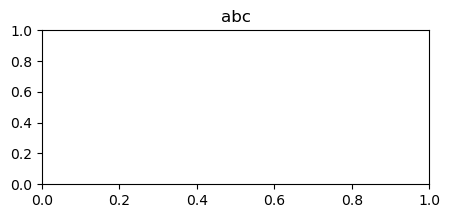

In [163]:
plt.figure(figsize=(5,2)) # 처음에 이 공간에서 그릴게요
#plt.axes()
plt.title('abc')  # figure 만들고 axes 만들고 타이틀 한 것. (단계별로 자동적)

Text(0.5, 1.0, 'abc')

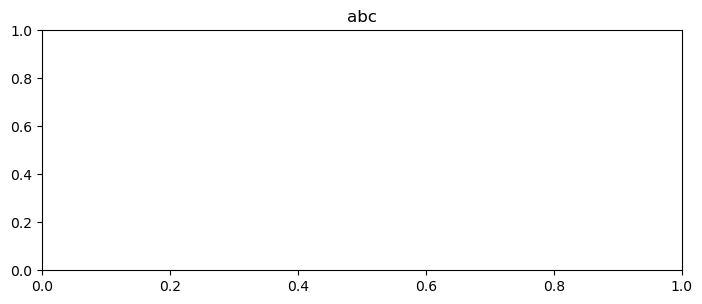

In [167]:
# 변수가 없는 이유? state machine 은 내 주변에 있는 값을 찾아서 만들어 줌. 변수를 지정해줄 필요가 없음
plt.axes((0,5,1,0.5,))
plt.title('abc')

Text(0.5, 1.0, 'abc')

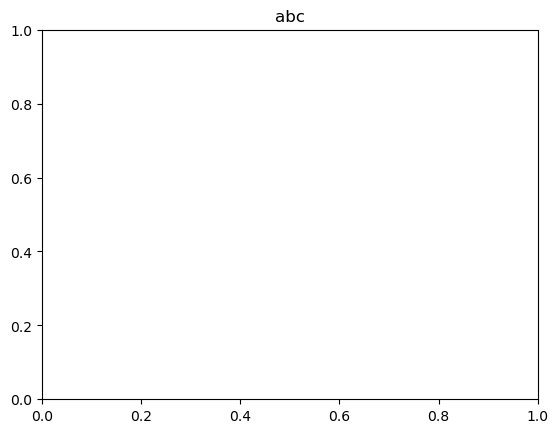

In [168]:
plt.title('abc')

(-0.1, 2.1, 0.9, 3.1)

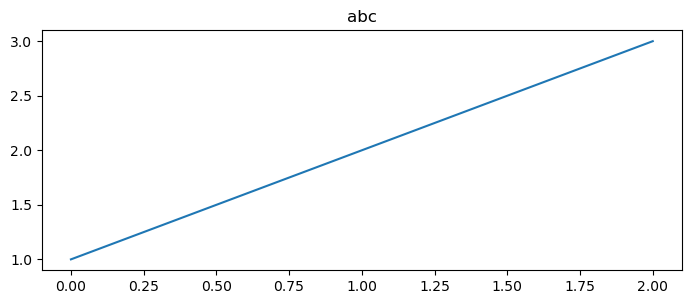

In [172]:
# 한줄한줄 못 쓰는 대신, 내가 변수를 지정할 필요가 없음(같은 셀에 있어야 한다는 것)
plt.axes((0,5,1,0.5,))
plt.plot([1,2,3])
plt.title('abc')
plt.axis()

# 즉 작동원리가 같은 셀에서 절차대로 자동적으로 진행된다는 것.

Text(0.5, 1.0, 'abc')

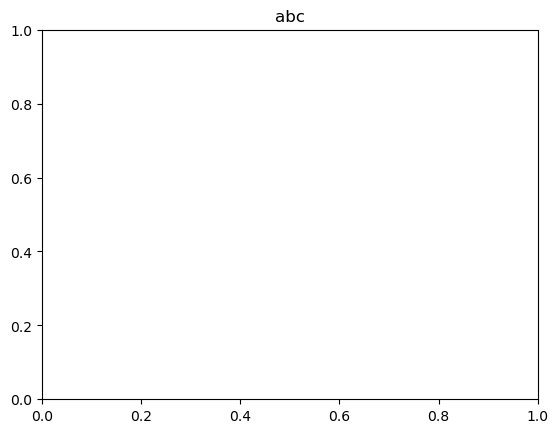

In [174]:
# 위가 너무 어려워서 파이썬은 객체지향 방식을 씀
fig, ax = plt.subplots(1)
ax.set_title('abc')
# 이런 방식을 지원해줌. 객체지향 스타일

In [ ]:
# 이거를 또 혼합해서 쓸 수 있음.
# 익숙해지면 어렵지 않음. state machine